In [1]:
critics = {
    "Lisa Rose": {
        "Lady in the Water": 2.5,
        "Snakes on a Plane": 3.5,
        "Just My Luck": 3.0,
        "Superman Returns": 3.5,
        "You, Me and Dupree": 2.5,
        "The Night Listener": 3.0,
    },
    "Gene Seymour": {
        "Lady in the Water": 3.0,
        "Snakes on a Plane": 3.5,
        "Just My Luck": 1.5,
        "Superman Returns": 5.0,
        "The Night Listener": 3.0,
        "You, Me and Dupree": 3.5,
    },
    "Michael Phillips": {
        "Lady in the Water": 2.5,
        "Snakes on a Plane": 3.0,
        "Superman Returns": 3.5,
        "The Night Listener": 4.0,
    },
    "Claudia Puig": {
        "Snakes on a Plane": 3.5,
        "Just My Luck": 3.0,
        "The Night Listener": 4.5,
        "Superman Returns": 4.0,
        "You, Me and Dupree": 2.5,
    },
    "Mick LaSalle": {
        "Lady in the Water": 3.0,
        "Snakes on a Plane": 4.0,
        "Just My Luck": 2.0,
        "Superman Returns": 3.0,
        "The Night Listener": 3.0,
        "You, Me and Dupree": 2.0,
    },
    "Jack Matthews": {
        "Lady in the Water": 3.0,
        "Snakes on a Plane": 4.0,
        "The Night Listener": 3.0,
        "Superman Returns": 5.0,
        "You, Me and Dupree": 3.5,
    },
    "Toby": {
        "Snakes on a Plane": 4.5,
        "You, Me and Dupree": 1.0,
        "Superman Returns": 4.0,
    },
}

In [2]:
def similar_films(critics: dict, person1: str, person2: str):
    """Return list of films rated by both users

    Args:
        critics (dict): dict with names and films
        person1 (str): name of the 1st critic
        person2 (str): name of the 2nd critic
    """

    sim_film = []
    for film in critics[person1]:
        if film in critics[person2]:
            sim_film.append(film)

    return sim_film

In [3]:
def sim_distance(critics: dict, person1: str, person2: str) -> float:
    """Calculates euclidean distance based on critics' scores

    Args:
        critics (dict): dict with names and films
        person1 (str): name of the 1st critic
        person2 (str): name of the 2nd critic
    """
    sim_films = similar_films(critics, person1, person2)
    if len(sim_films) == 0:
        return 0

    sum_of_euclead_dist = 0

    for film in sim_films:
        sum_of_euclead_dist += (critics[person1][film] - critics[person2][film]) ** 2

    return 1 / (1 + sum_of_euclead_dist)

In [4]:
sim_distance(critics, "Lisa Rose", "Toby")

0.2222222222222222

In [5]:
import numpy as np

In [7]:
dist_sim_vals = np.zeros((len(critics), len(critics)))

for i, source in enumerate(critics):
    for j, refer in enumerate(critics):
        dist_sim_vals[i, j] = sim_distance(critics, source, refer)

dist_sim_vals.round(3)


array([[1.   , 0.148, 0.444, 0.286, 0.333, 0.211, 0.222],
       [0.148, 1.   , 0.211, 0.133, 0.129, 0.8  , 0.108],
       [0.444, 0.211, 1.   , 0.571, 0.286, 0.182, 0.286],
       [0.286, 0.133, 0.571, 1.   , 0.174, 0.182, 0.235],
       [0.333, 0.129, 0.286, 0.174, 1.   , 0.138, 0.308],
       [0.211, 0.8  , 0.182, 0.182, 0.138, 1.   , 0.118],
       [0.222, 0.108, 0.286, 0.235, 0.308, 0.118, 1.   ]])

In [8]:
dist_sim_vals.mean(), dist_sim_vals.std()

(0.36752489116590864, 0.2993937425464388)

In [14]:
triangle_mask = np.tri(len(critics), k=-1, dtype=np.bool_)

norm_dist_vals = dist_sim_vals[triangle_mask]

norm_dist_vals.round(3)


array([0.148, 0.444, 0.211, 0.286, 0.133, 0.571, 0.333, 0.129, 0.286,
       0.174, 0.211, 0.8  , 0.182, 0.182, 0.138, 0.222, 0.108, 0.286,
       0.235, 0.308, 0.118])

In [15]:
import matplotlib.pyplot as plt


def plot_pdf(values: np.ndarray, title: str):
    """Plots `values` distribution density"""
    plt.figure(figsize=(10, 5))
    plt.violinplot(values.flatten(), vert=False, showmedians=True)
    plt.xlabel("Similarity")
    plt.grid()
    plt.title(title)
    plt.show()


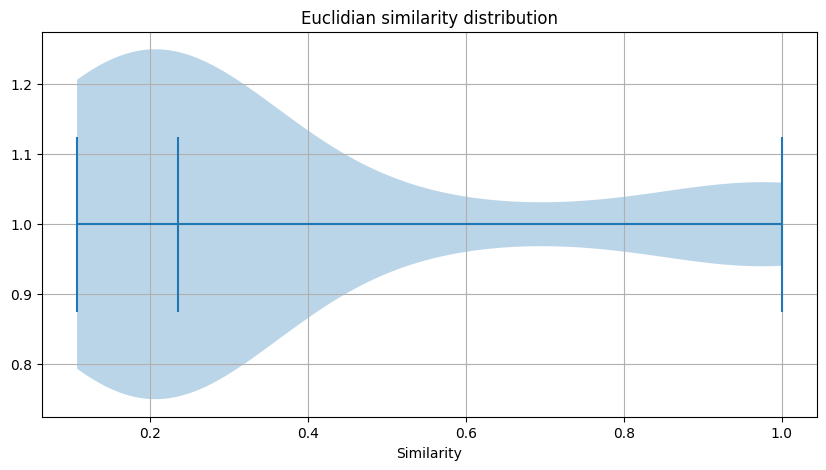

In [16]:
plot_pdf(dist_sim_vals, "Euclidian similarity distribution")

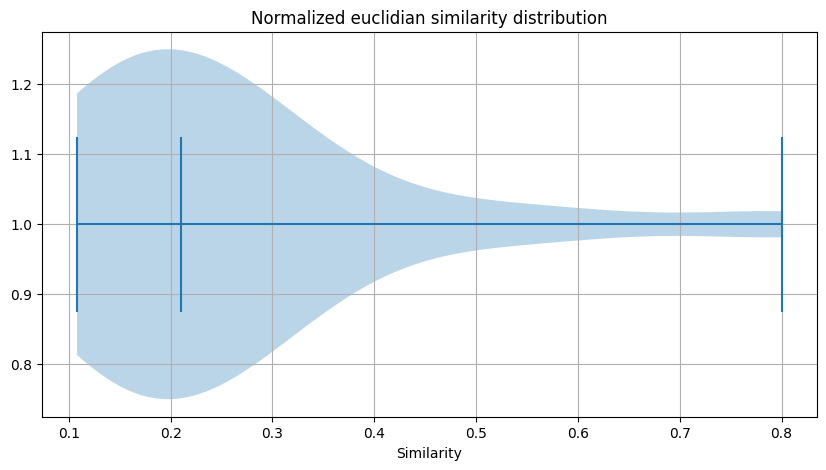

In [17]:
plot_pdf(norm_dist_vals, "Normalized euclidian similarity distribution")

In [19]:
from math import isnan

from scipy.stats import pearsonr


def sim_pearson(critics_dict, person1, person2):
    """Calculates pearson correlation based similarity between two persons"""

    sim_films = similar_films(critics_dict, person1, person2)

    if len(sim_films) < 2:
        return 0

    scores1 = []

    scores2 = []

    for film in sim_films:
        scores1.append(critics_dict[person1][film])

        scores2.append(critics_dict[person2][film])

    correlation = pearsonr(scores1, scores2)[0]

    if isnan(correlation):
        return 0

    return correlation


In [20]:
sim_pearson(critics, "Lisa Rose", "Gene Seymour")

0.3960590171906697

In [21]:
sim_pearson(critics, "Lisa Rose", "Toby")

0.9912407071619302

In [24]:
dist_pear_vals = np.zeros((len(critics), len(critics)))

for i, source in enumerate(critics):
    for j, referer in enumerate(critics):
        dist_pear_vals[i, j] = sim_pearson(critics, source, referer)

dist_pear_vals.round(3)


array([[ 1.   ,  0.396,  0.405,  0.567,  0.594,  0.747,  0.991],
       [ 0.396,  1.   ,  0.205,  0.315,  0.412,  0.964,  0.381],
       [ 0.405,  0.205,  1.   ,  1.   , -0.258,  0.135, -1.   ],
       [ 0.567,  0.315,  1.   ,  1.   ,  0.567,  0.029,  0.893],
       [ 0.594,  0.412, -0.258,  0.567,  1.   ,  0.211,  0.924],
       [ 0.747,  0.964,  0.135,  0.029,  0.211,  1.   ,  0.663],
       [ 0.991,  0.381, -1.   ,  0.893,  0.924,  0.663,  1.   ]])

In [25]:
dist_pear_vals.mean(), dist_pear_vals.std()

(0.5159356584296166, 0.4713252827635987)

In [27]:
triangle_mask = np.tri(len(critics), k=-1, dtype=np.bool_)

norm_pear_sim_vals = dist_pear_vals[triangle_mask]

norm_pear_sim_vals.round(3)


array([ 0.396,  0.405,  0.205,  0.567,  0.315,  1.   ,  0.594,  0.412,
       -0.258,  0.567,  0.747,  0.964,  0.135,  0.029,  0.211,  0.991,
        0.381, -1.   ,  0.893,  0.924,  0.663])

In [28]:
norm_pear_sim_vals.mean(), norm_pear_sim_vals.std()

(0.43525826816788604, 0.4621798568790931)

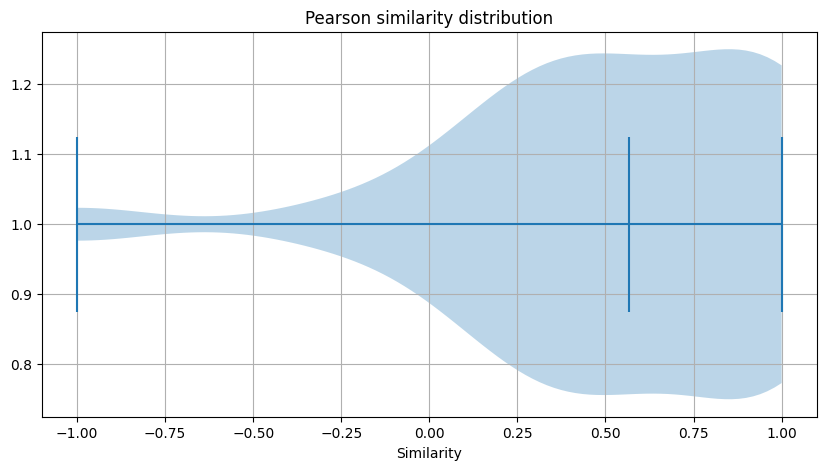

In [29]:
plot_pdf(dist_pear_vals, "Pearson similarity distribution")


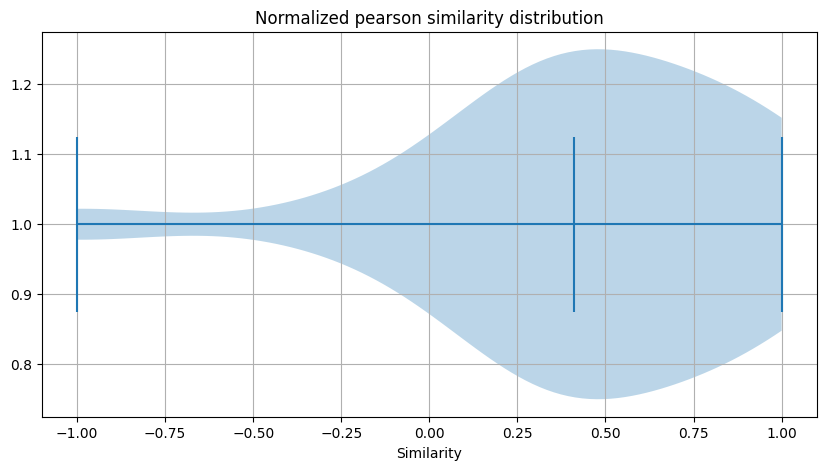

In [30]:
plot_pdf(norm_pear_sim_vals, "Normalized pearson similarity distribution")

In [31]:
from typing import Callable, List


def top_matches(
    critics: dict, person: str, n: int = 5, similarity_fn: Callable = sim_pearson
) -> List[str]:
    """Top-n most similary critics



    Args:

        critics (dict): dict of critics

        person (str): critic

        n (int, optional): number of similar critics. Defaults to 5.

        similarity_fn (Callable, optional): similarity function. Defaults to sim_pearson.



    Returns:

        List[str]: list of similar critics

    """
    scores = []

    for other in critics:
        if other == person:
            continue
        similarity_score = similarity_fn(critics, person, other)
        scores.append((similarity_score, other))
    scores.sort(reverse=True)

    return scores[:n]


In [32]:
top_matches(critics, "Toby", n=3, similarity_fn=sim_pearson)


[(0.9912407071619302, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415643, 'Claudia Puig')]

In [33]:
top_matches(critics, "Toby", n=3, similarity_fn=sim_distance)


[(0.3076923076923077, 'Mick LaSalle'),
 (0.2857142857142857, 'Michael Phillips'),
 (0.23529411764705882, 'Claudia Puig')]

In [34]:
def get_recommendations(prefs: dict, person: str, similarity: Callable = sim_pearson):
    """Calculates recommendations fof a 'person' using weighted mean from 'prefs'

    Args:
        prefs (dict): _description_
        person (str): name of person
        similarity (Callable, optional): _description_. Defaults to sim_pearson.
    """
    totals = {}
    sim_sums = {}

    for other in prefs:
        if other == person:
            continue
        sim = similarity(prefs, person, other)

        if sim <= 0:
            continue

        for item in prefs[other]:
            if item not in prefs[person] or prefs[person][item] == 0:
                totals[item] = totals.get(item, 0) + prefs[other][item] * sim

                sim_sums[item] = sim_sums.get(item, 0) + sim

    rankings = [(total / sim_sums[item], item) for item, total in totals.items()]
    rankings.sort(reverse=True)

    return rankings


In [35]:
get_recommendations(critics, "Toby", sim_pearson)


[(3.347789526713101, 'The Night Listener'),
 (2.832549918264162, 'Lady in the Water'),
 (2.530980703765565, 'Just My Luck')]

In [36]:
critics["Toby"]


{'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0, 'Superman Returns': 4.0}

In [37]:
get_recommendations(critics, "Toby", sim_distance)


[(3.5002478401415877, 'The Night Listener'),
 (2.7561242939959363, 'Lady in the Water'),
 (2.461988486074374, 'Just My Luck')]

In [38]:
def transform_prefs(critics: dict) -> dict:
    """Inverts nested dict of critics-film-scores into films-critics-scores dict"""
    result = {}

    for person in critics:
        for item in critics[person]:
            result.setdefault(item, {})
            result[item][person] = critics[person][item]

    return result


In [39]:
def calculate_similar_items(
    prefs: dict, n: int = 10, similarity_fn: Callable = sim_distance
):
    """Creates a dict with most similar items for each item"""
    result = {}
    item_prefs = transform_prefs(prefs)

    c = 0
    for item in item_prefs:
        c += 1

        scores = top_matches(item_prefs, item, n=n, similarity_fn=similarity_fn)
        result[item] = scores

        if c % 100 == 0:
            print("%d / %d" % (c, len(item_prefs)))
    return result


In [40]:
itemsim_dist = calculate_similar_items(critics, n=10)
itemsim_pears = calculate_similar_items(critics, n=10, similarity_fn=sim_pearson)


In [41]:
import pprint

pp = pprint.PrettyPrinter(indent=4)


In [42]:
pp.pprint(itemsim_dist)

{   'Just My Luck': [   (0.2222222222222222, 'Lady in the Water'),
                        (0.18181818181818182, 'You, Me and Dupree'),
                        (0.15384615384615385, 'The Night Listener'),
                        (0.10526315789473684, 'Snakes on a Plane'),
                        (0.06451612903225806, 'Superman Returns')],
    'Lady in the Water': [   (0.4, 'You, Me and Dupree'),
                             (0.2857142857142857, 'The Night Listener'),
                             (0.2222222222222222, 'Snakes on a Plane'),
                             (0.2222222222222222, 'Just My Luck'),
                             (0.09090909090909091, 'Superman Returns')],
    'Snakes on a Plane': [   (0.2222222222222222, 'Lady in the Water'),
                             (0.18181818181818182, 'The Night Listener'),
                             (0.16666666666666666, 'Superman Returns'),
                             (0.10526315789473684, 'Just My Luck'),
                             (

In [43]:
itemsim_dist["Superman Returns"]

[(0.16666666666666666, 'Snakes on a Plane'),
 (0.10256410256410256, 'The Night Listener'),
 (0.09090909090909091, 'Lady in the Water'),
 (0.06451612903225806, 'Just My Luck'),
 (0.05333333333333334, 'You, Me and Dupree')]

In [49]:
def get_recommended_items(prefs: dict, item_match: dict, user: str):
    """Calculate recommendations for 'user' using mean scores based on item similarity"""
    user_ratings = prefs[user]
    scores = {}
    total_sim = {}

    for item, rating in user_ratings.items():
        for similarity, item2 in item_match[item]:
            if item2 in user_ratings:
                continue
            scores[item2] = scores.get(item2, 0) + similarity * rating
            total_sim[item2] = total_sim.get(item2, 0) + similarity
            if total_sim[item2] == 0:
                total_sim[item2] = 1e-7

    rankings = [(score / total_sim[item], item) for item, score in scores.items()]

    rankings.sort(reverse=True)

    return rankings


In [50]:
critics["Toby"]


{'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0, 'Superman Returns': 4.0}

In [51]:
get_recommended_items(critics, itemsim_dist, "Toby")


[(3.182634730538922, 'The Night Listener'),
 (2.5983318700614575, 'Just My Luck'),
 (2.4730878186968837, 'Lady in the Water')]

In [52]:
get_recommended_items(critics, itemsim_pears, "Toby")

[(3.6100310668021787, 'Lady in the Water'),
 (3.5313950341859823, 'The Night Listener'),
 (2.9609998607242685, 'Just My Luck')]